In [ ]:
#create the truth table for AND gate
import numpy as np
x=np.array([[1,1,1,1],[0,0,1,1],[0,1,0,1]]) #x0,x1,x2
y=np.array([0,0,0,1]) #output
print("The Truth Table:",x,y)


The Truth Table: [[1 1 1 1]
 [0 0 1 1]
 [0 1 0 1]] [0 0 0 1]


In [ ]:
#Pick the random weights (w0,w1,w2)
import random
w0=random.uniform(-1, 1)
w1=random.uniform(-1, 1)
w2=random.uniform(-1, 1)
w=np.array([w0,w1,w2])
print(w)

[ 0.47653407 -0.63026371  0.47186965]


In [ ]:
w_initial=[w0, w1, w2]

In [ ]:
#calculate the slope 'm' and co-efficient 'c' of y=mx+c
def points(X,W):
  c=-W[0]/W[2]
  m=-W[1]/W[2]
  y=np.multiply(X,m)+c
  return y

In [ ]:
#check the weights and find if it reach the expected output values
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

In [ ]:
#create the truth table (merging x and y)
truth_table=np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])
print(truth_table)

[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]


In [ ]:
#Check if initial weight values can predict the output
for row in truth_table:
  prediction=predict(row,w) #w=initial random weights (w0,w1,w2)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))
  #e=row[-1]-prediction
  #print(e)


Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1


In [ ]:
# Estimate Perceptron weights  calculating epoch independently and converged
def train_weights(train, l_rate, n_epoch,weights):
	#weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		#error=100
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [ ]:
#calculate the weights using Stochastic gradient descent using number of epoch=20
l_rate = 0.1
n_epoch = 20   #My all results were right within epoch=20, if needed please increase the number of epoch
weights = train_weights(truth_table, l_rate, n_epoch,w)
print(weights)

epoch=0, lrate=0.100, error=2.000
epoch=1, lrate=0.100, error=3.000
epoch=2, lrate=0.100, error=3.000
epoch=3, lrate=0.100, error=3.000
epoch=4, lrate=0.100, error=2.000
epoch=5, lrate=0.100, error=2.000
epoch=6, lrate=0.100, error=1.000
epoch=7, lrate=0.100, error=2.000
epoch=8, lrate=0.100, error=2.000
epoch=9, lrate=0.100, error=1.000
epoch=10, lrate=0.100, error=0.000
epoch=11, lrate=0.100, error=0.000
epoch=12, lrate=0.100, error=0.000
epoch=13, lrate=0.100, error=0.000
epoch=14, lrate=0.100, error=0.000
epoch=15, lrate=0.100, error=0.000
epoch=16, lrate=0.100, error=0.000
epoch=17, lrate=0.100, error=0.000
epoch=18, lrate=0.100, error=0.000
epoch=19, lrate=0.100, error=0.000
[-0.22346593  0.06973629  0.17186965]


In [ ]:
#Check if calculated weight values can predict the output
for row in truth_table:
  prediction=predict(row,weights) #w=initial random weights (w0,w1,w2)
  print("Expected=%d, Predicted=%d" % (row[-1], prediction))
  #e=row[-1]-prediction
  #print(e)


Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1


In [ ]:
weights

array([-0.21074825,  0.14587129,  0.10507725])

In [ ]:
#Plot the values against the actual standard one
#calculate points over X-axis and Y-axis
wt=np.array([-1,.95,.95])
px=np.array([1,0]) #random value for x1, for standard weights, calculated manually 
py1_s=points(px[0],wt) #calculate the value for x2,for standard weights
py2_s=points(px[1],wt)
py_s=np.array([py1_s,py2_s])
px=np.array([1,0]) #random value for x1, for random initial weights
py1_calc=points(px[0],weights) #calculate the value for x2,for random initial weights
py2_calc=points(px[1],weights)
py_calc=np.array([py1_calc,py2_calc])
py1_rand=points(px[0],w_initial) #calculate the value for x2,for random initial weights
py2_rand=points(px[1],w_initial)
py_rand=np.array([py1_rand,py2_rand])


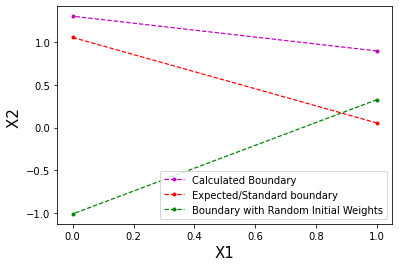

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
test1 = plt.figure()
plt.plot(px, py_calc, linestyle='--',marker='.',color='m',label='Calculated Boundary',linewidth=1.2)  
plt.plot(px, py_s,linestyle='--', marker='.',color='red',label='Expected/Standard boundary',linewidth=1.2) 
plt.plot(px, py_rand,linestyle='--', marker='.',color='green',label='Boundary with Random Initial Weights',linewidth=1.2) 
# naming the x axis 
x=plt.xlabel('X1', fontsize='15') 
x.set_color("black")
# naming the y axis 
y=plt.ylabel('X2 ',fontsize='15') 
y.set_color("black")

plt.legend()
#plt.ylim([0,2])

In [ ]:
py_rand

array([1.85735518, 2.17944666])

In [ ]:
#From here, this is just extra part, just coded differently, but expected results are same

In [ ]:
#Weight calculation based on changing wrong predictions
def train_new(train,l_rate,n_epoch,weights):
  for epoch in range(n_epoch):
    abs_error=0
    sum_error=0
    for row in train:
      prediction=predict(row,weights)
      #print(prediction)
      error= row[-1]-prediction
      sum_error += error**2
      abs_error=error**2
      weights[0]= weights[0] + l_rate * error
      #print((abs_error))
      #print(abs_error)
      for i in range(len(row)-1):
        if abs_error>0:
           weights[i+1]=weights[i+1]+error*row[i]*l_rate
        else:
           weights[i+1]=weights[i+1]
    print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
  return weights

In [ ]:
l_rate = 0.1
n_epoch = 20
print(ws)
weights = train_new(truth_table, l_rate, n_epoch,ws)
print(weights)

[0.6544425, 0.07909314, -0.91720387]
epoch=0, lrate=0.100, error=3.000
epoch=1, lrate=0.100, error=3.000
epoch=2, lrate=0.100, error=3.000
epoch=3, lrate=0.100, error=3.000
epoch=4, lrate=0.100, error=3.000
epoch=5, lrate=0.100, error=3.000
epoch=6, lrate=0.100, error=3.000
epoch=7, lrate=0.100, error=2.000
epoch=8, lrate=0.100, error=2.000
epoch=9, lrate=0.100, error=2.000
epoch=10, lrate=0.100, error=2.000
epoch=11, lrate=0.100, error=3.000
epoch=12, lrate=0.100, error=2.000
epoch=13, lrate=0.100, error=1.000
epoch=14, lrate=0.100, error=0.000
epoch=15, lrate=0.100, error=0.000
epoch=16, lrate=0.100, error=0.000
epoch=17, lrate=0.100, error=0.000
epoch=18, lrate=0.100, error=0.000
epoch=19, lrate=0.100, error=0.000
[-0.2455574999999999, 0.17909314, 0.08279612999999986]
